In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:


# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
# np.savez('fishing.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
#https://github.com/ioskn/mldl_htwg/raw/master/data/fishing.npz
import os
from urllib.request import urlretrieve
if not os.path.isfile('fishing.npz'):
    print("Downloading")
    urlretrieve('http://www-home.htwg-konstanz.de/~oduerr/data/fishing.npz',filename = 'fishing.npz')
d = np.load('fishing.npz')
X_train = d['Xt'] #"livebait","camper","persons","child"
X_test = d['Xte']
y_train = d['yt']
y_test = d['yte']

Downloading


In [3]:


from sklearn.linear_model import LinearRegression
Xd = np.hstack([np.ones((X_train.shape[0],1)), X_train])
pd.DataFrame(Xd[0:2])
Xdt = np.hstack([np.ones((X_test.shape[0],1)), X_test])
X_train.shape,Xd.shape
model_skl = LinearRegression(fit_intercept=False)
res = model_skl.fit(Xd, y_train)
res.coef_



array([-8.49222821,  2.4822138 ,  2.95430727,  4.64953914, -5.47160051])

In [4]:


ypred = model_skl.predict(Xdt)
#ypred = np.ones_like(y_test) * np.median(y_train)
sigma_hat_2 = np.mean((y_test - ypred.flatten())**2)
np.sqrt(sigma_hat_2),sigma_hat_2,Xdt.shape



(8.588126386734231, 73.75591483452077, (50, 5))

In [5]:
0.5*np.log(2 * np.pi * sigma_hat_2) + 0.5*np.mean((y_test - ypred.flatten())**2)/sigma_hat_2

3.5693191297796893

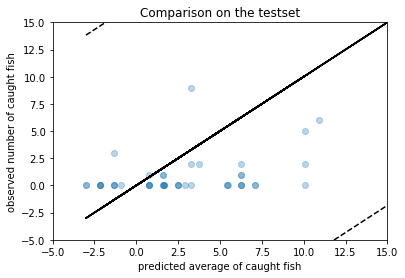

In [6]:
plt.scatter(ypred, y_test,alpha=0.3)
sort_idx=np.argsort(ypred,axis=0)
plt.plot(ypred[sort_idx].flatten(), ypred[sort_idx].flatten()+1.96*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(ypred[sort_idx].flatten(), ypred[sort_idx].flatten()-1.96*np.sqrt(sigma_hat_2),linestyle='dashed',c="black")
plt.plot(ypred, ypred, c="black")
plt.title('Comparison on the testset')
plt.xlabel('predicted average of caught fish')
plt.ylabel('observed number of caught fish')
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.show()

In [7]:
def NLL(y_train, Xd, w):
    mu = np.exp(np.matmul(Xd,w))
    ret = np.zeros_like(mu)
    for i in range(ret.shape[0]):
        ret[i] = mu[i] - y_train[i]*np.log(mu[i]) + np.log(1.0*np.math.factorial(y_train[i]))
    return np.mean(ret)
w = np.ones(5)
NLL(y_train, Xd,w)

1507.9856602262082

In [9]:
def gradNLL(y_train, Xd, w):
    mu = np.exp(np.matmul(Xd,w))
    #print(mu.shape)
    ret = np.zeros_like(Xd)
    for i in range(Xd.shape[0]):
        mux = Xd[i] * mu[i]
        ret[i] = -mux + y_train[i] *Xd[i]
    return np.mean(ret, axis=0)

NLL(y_train, Xd,np.ones(5))
np.round(gradNLL(y_train, Xd,np.ones(5)),2)
#1518.61, 1403.99, 1171.02, 5701.91, 3258.7

array([-1518.61, -1403.99, -1171.02, -5701.91, -3258.7 ])

In [10]:


from tqdm import tqdm 
w = np.ones(5)
hist = []
for i in tqdm(range(10000)):
    if (i % 10 == 0):
        hist.append(NLL(y_train, Xd,w))
    w = w + 0.001 * gradNLL(y_train, Xd,w)
w, NLL(y_train, Xd,w)



100%|██████████| 10000/10000 [00:09<00:00, 1025.60it/s]


(array([-1.74007527,  0.56500613,  0.66091814,  0.93220074, -1.62023821]),
 3.3806067025761606)

(0, 5)

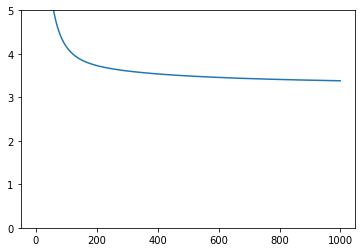

In [11]:
plt.plot(hist)
plt.ylim(0,5)

In [12]:


mupred = np.exp(np.matmul(Xdt, w))
np.sqrt(np.mean((mupred - y_test)**2)), NLL(y_test, Xdt,w)



(7.389176645536159, 2.8768358338221565)